In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
train_pd = pd.read_csv("train.csv")

In [65]:
train_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_pd.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
train_pd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

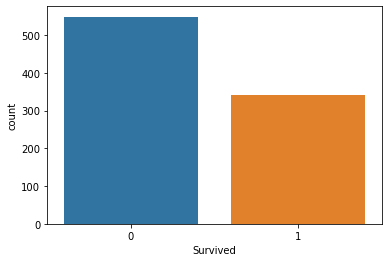

In [68]:
sns.countplot(x="Survived",data=train_pd)

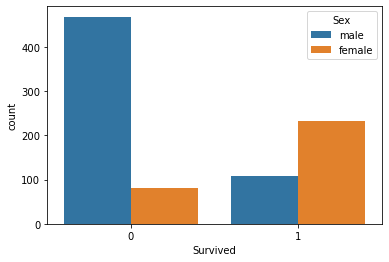

In [69]:
sns.countplot(x="Survived",hue="Sex",data=train_pd)

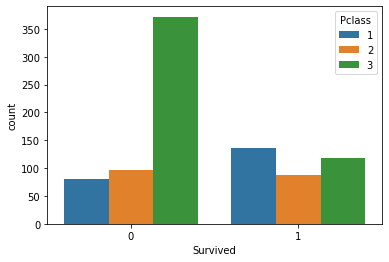

In [70]:
sns.countplot(x="Survived",hue="Pclass",data=train_pd)

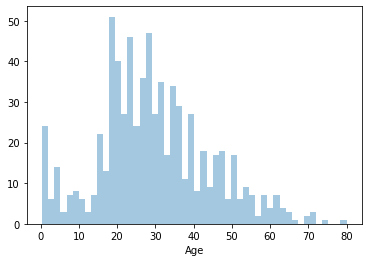

In [71]:
sns.distplot(train_pd["Age"].dropna(),kde=False,bins=50) # or use hist from matplotlib

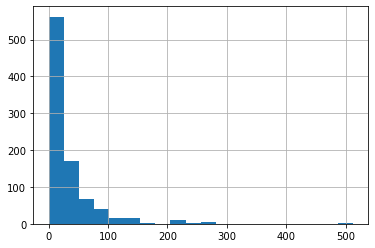

In [72]:
train_pd["Fare"].hist(bins=20)

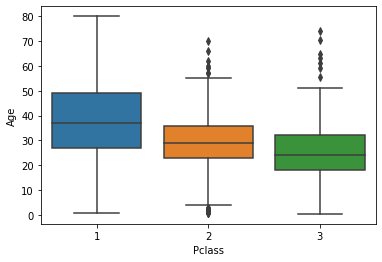

In [73]:
sns.boxplot(x="Pclass",y="Age",data=train_pd)

In [74]:
def impute_age(dd):
    Age=dd[0]
    Pclass=dd[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 30
        if Pclass==3:
            return 24
    else:
        return Age
    

In [75]:
train_pd["Age"] = train_pd[["Age","Pclass"]].apply(impute_age,axis=1)

In [76]:
train_pd["Age"].isnull().sum()

0

In [77]:
train_pd.drop("Cabin",axis=1,inplace=True)

In [78]:
train_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
embarked = pd.get_dummies(train_pd["Embarked"],drop_first=True)

In [80]:
sex = pd.get_dummies(train_pd["Sex"],drop_first=True)

In [81]:
train_pd.drop(["Embarked","Sex","Name","Ticket"],axis=1,inplace=True)

In [82]:
train_pd.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [83]:
train_pd = pd.concat([train_pd,sex,embarked],axis=1)

In [84]:
train_pd.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [86]:
train_pd['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train_pd.drop('Survived',axis=1), 
                                                    train_pd['Survived'], test_size=0.30, 
                                                    random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
predictions = logmodel.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
accuracy=confusion_matrix(y_test,predictions)

In [95]:

accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104